# Transformermodell for å predikere sekvenser


In [3]:
from layers import *
from data_generators import *
import matplotlib.pyplot as plt
from neural_network import *
from oppgave3_2_1 import *
from oppgave3_4 import *

I dette prosjektet skal vi implementerte en transformermodell, som er en type dyp læringsmodell, for å predikere sekvenser. Oppgave 1 omhandler forståelse av transformermodellen. Oppgave to omhandler testing av den objektiv orienterte implementasjonen av det nevrale nettverket. I oppgave tre så ser vi to ulike deloppgaver der vi bruker transformermodellen: sortering og addisjon. I begge disse deloppgavene bruker vi både *steepest descent* og *Adam-algortimen* for å kunne sammenligne disse to ulike treningsalgoritmene. I bonusoppgaven bruker vi transformermodellen for å trene en tekstgenerator for å kunne skrive som Shakespeare.

## Oppgave 1

a) Vi ønsker å predikere et heltall $d = a ⋅ b + c$, der $a$ og $c$ er tosifrede og $b$ er etsifret. Merk at $max(d)$ = $99 · 9 + 99 = 990$, altså representerer vi $d$ som tresifret. Vi lar den sanne verdien verdien av $d =  d_2 \cdot 10^2 \cdot d_1 \cdot 10^1 + d_0 \cdot 10^0$. Under treningen bør vi reversere tallet da dette fordi det fungerer bedre for treningen. Altså vil $y = [d_0, d_1, d_2]$. Under treningen lar vi inputen til det nevrale nettverket $x$ være på formen $[a_1, a_0, b_0, c_1, c_0, d_0, d_1]$. I treningen ønsker vi å optimere paramatere slik at vi kan predikere det siste sifferet i $y$, det vil si $d_2$. Output av det nevrale nettverket vil være på formen $[m_6, m_5, m_4, m_3, m_2, m_1, m_0]$, der alle $m$-verdiene kommer fra modellen. Vår prediksjon blir det tre siste av disse: $\hat{y}= [m_2, m_1, m_0]$. Målet for optimeringen blir å finne parametermatriser slik at $\hat{y} = y$, altså $d$ reversert. For eksempel kan vi la $a = 13$, $b = 3$, $c = 14$, som gir $d = 13 \cdot 3 + 14 = 53$ og $y = [3, 5, 0]$ Da blir input:
$$ x = [1, 3, 3, 1, 4, 3, 5]$$
Modellen gir:
$$f_θ(x) = f_θ([1, 3, 3, 1, 4, 3, 5]) = [m_6, m_5, m_4, m_3, m_2, m_1, m_0]$$
Og vi ønsker å finne parametere slik at:
$$[m_2, m_1, m_0] = [3, 5, 0]$$

1b)
Når optimeringen tar vi input som $x = x^{(0)} = [a_1, a_0, b_0, c_1, c_0]$. Vi kjører denne gjennom modellen og får $\hat{z}_0 = [z_4^{(0)}, z_3^{(0)}, z_2^{(0)}, z_1^{(0)}, z_0^{(0)}]$. Vi legger så til det siste tallet i $\hat{z}_0$ til $x^{(0)}$ og får $x^{(1)} = [a_1, a_0, b_0, c_1, c_0, z_0^{(0)}]$. Vi gjentar dette to ganger til, slik at vi ender opp med $x^{(3)} = [a_1, a_0, b_0, c_1, c_0, z_0^{(0)}, z_0^{(1)}, z_0^{(2)}]$. Da gir modellen vår en prediksjon på $[z_0^{(0)}, z_0^{(1)}, z_0^{(2)}]$. Et eksempel kan være $a = 17$, $b = 5$, $c = 18$ og $d = 17 \cdot 5 + 18 = 103$, som gir $y = [3, 0, 1]$. Input blir:
$$ x = [1, 7, 5, 1, 8]$$
Til slutt får vi:
$$x^{(3)} = [a_1, a_0, b_0, c_1, c_0, z_0^{(0)}, z_0^{(1)}, z_0^{(2)}]$$
Altså er modellens prediksjon for $y$:
$$[z_0^{(0)}, z_0^{(1)}, z_0^{(2)}]$$



1 c)

Vi vet at objektfunksjonen $L$ for et datapunkt $y$ er
$$ L = -∑_{j = 0}^{n-1}log\hat{Y}_{k, j}, k = y_j$$
og $\hat{Y}$ må ha dimensjon $m × n$. Hver kolonne i $\hat{Y}$ må summere til $1$ da hver kolonne er en sannsynlighetsfordeling. For vårt spesifikke tilfelle med $y = [4, 3, 2, 1]$ får vi:
$$ L = -(log\hat{Y}_{4,0} + log\hat{Y}_{3,1} + log\hat{Y}_{2,2} + log\hat{Y}_{1,3})$$
Der matrisen $\hat{Y}$ er nullindeksert. Merk at disse $\hat{Y}_{ij}$-verdiene oppfyller at alle kolonnesummene er lik $1$. For å få objektfunksjon lik $0$ må alle $\hat{Y}_{ij}$-verdiene gitt i ligningen over være $1$, hvis ikke får vi en positiv objektfunksjon. Da vil $\hat{Y}$ være identisk lik med $onehot(y)$. Altså:
$$\hat{Y} =  
\begin{bmatrix}
0&0&0&0\\
0&0&0&1\\
0&0&1&0\\
0&1&0&0\\
1&0&0&0\\
\end{bmatrix}
$$

  og vi får at $\hat{y} = argmax_{col}(\hat{Y}) = y$.

1 d)

Vi har:

$W_E, W_U \in \mathbb{R}^{d \times m}$

$W_P \in \mathbb{R}^{ d \times n_{max}}$

$W_O, W_V, W_Q, W_K \in \mathbb{R}^{ k\times d}$

$W_1, W_2 \in \mathbb{R}^{ p\times d}$

$\theta = \{ W_E, W_P, W_U \{ W_O^{(l)}, W_V^{(l)}, W_Q^{(l)}, W_K^{(l)}, W_1^{(l)}, W_2^{(l)} \}_{l=0}^{L-1} \}$

La $n_w(L, d, k, p, m, n_{max})$ være antall enkeltparametre i en transformermodell.

Da

$n_w(L, d, k, p, m, n_{max}) = L\cdot (4k\cdot d + 2p\cdot d) + 2d\cdot m + d\cdot n_{max}$

dermed

$n_w(L, d, k, p, m, n_{max}) = d\cdot (L\cdot (4k + 2p) + 2m + n_{max})$


1 e)

Vi har:

$n = n_{max} = 1$,

$m = d = k = p = 2, L = 1$,

$W_O = W_V = W_Q = W_1 = W_2 = W_U = I^2$,

$\sigma(x) = Relu(x) = max(0, x)$

$W_E = \begin{bmatrix}1&0\\0&\alpha\end{bmatrix}$

$W_P = \begin{bmatrix}1\\0\end{bmatrix}$

$x = \begin{bmatrix}1\end{bmatrix}$

Dermed

$X = onehot(x) = \begin{bmatrix}0\\1\end{bmatrix}$

$z_0 = W_EX+W_{P(0:n)} = \begin{bmatrix}0\\\alpha\end{bmatrix} + \begin{bmatrix}1\\0\end{bmatrix} =  \begin{bmatrix}1\\\alpha\end{bmatrix}$

$A(z_0) = Softmax_{col}(\begin{bmatrix}1+\alpha^2\end{bmatrix}) = \begin{bmatrix}1\end{bmatrix}$

$z_\frac{1}{2} = z_0 + W_O^TW_Vz_0A(z_0) = 2z_0 = \begin{bmatrix}2\\2\alpha\end{bmatrix}$

$z_1 = z_\frac{1}{2} + W_2^T\sigma(W_1 z_\frac{1}{2}) = \begin{bmatrix} 2\\2\alpha \end{bmatrix} + \begin{bmatrix}2\\max(0,2\alpha)\end{bmatrix}  = \begin{bmatrix}4\\2\alpha + max(0, 2\alpha)\end{bmatrix} $

$Z = Softmax(z_1) = \begin{bmatrix}exp(4)\\exp(2\alpha+max(0, 2\alpha))\end{bmatrix}\frac{1}{exp(4)+exp(2\alpha+max(0, 2\alpha))}$

$\hat{z} = argmax(Z)$

$\hat{z}$ er $\begin{bmatrix}0\end{bmatrix}$ om $exp(4)>exp(2\alpha+max(0, 2\alpha))$,

 $\hat{z}$ er $\begin{bmatrix}1\end{bmatrix}$ om $exp(4)<exp(2\alpha+max(0, 2\alpha))$

 Vi ønsker $\hat{z} = \begin{bmatrix}1\end{bmatrix}$, dermed  $exp(4)<exp(2\alpha+max(0, 2\alpha)) \implies 4 < 2\alpha + max(0, 2\alpha)$.

 La $\alpha < 0$, da $2\alpha + max(0, 2\alpha) = 2\alpha + 0 < 0 < 4$ Demed må $\alpha > 0$

 La $\alpha > 0$ dermed $2\alpha + max(0, 2\alpha) = 4\alpha > 4  \iff \alpha > 1 \iff \hat{z} = \begin{bmatrix}1\end{bmatrix}$.

 $\square$


## Oppgave 2


Et nettverk av klassen NeuralNetwork vil ha en tilhørende liste av lag av klassen layer og nettverkets step_gd prosedyre utfører step_gd prosedyren tilhørende hvert av lag i denne listen, gitt at laget har vekter. Lagene i nettverkets liste har klassen layer, som er en baseklasse, som definerer en prosedyre step_gd. Lagene i nettverket vil være underklasser av klassen layer, og vil dermed arve prosedyren step_gd slik den er definert i layer, gitt at underklassen ikke selv definerer en egen prosedyre step_gd.

Arv vil si at en underklasse av en baseklasse automatisk får funksjoner, prosedyrer og felter, slik de er definert i baseklassen. I noen tilfeller vil baseklassen kun deklarere funksjonen eller prosedyren, men ikke implementere dem, da vil underklassen selv måtte implementere funksjonen eller prosedyren, gitt at den skal brukes i underklassen, siden baseklassen deklarerer at den skal finnes.

Nettverkets step_gd vil altså kalle på lagenes step_gd, gitt at de har parametre, som kan være arvet fra deres baseklasse layer.


##Oppgave 3

###Implementasjon og testing

Lagenes korrekte funksjon ble verifisert, og videre ble treningsalgoritmen implementert i henhold til algoritme 4.

In [4]:
#We choose some arbitrary values for the dimensions
b = 6
n_max = 7
m = 8
n = 5

d = 10
k = 5
p = 20

#Create an arbitrary dataset
x = np.random.randint(0, m, (b,n))
y = np.random.randint(0, m, (b,n_max))

#initialize the layers
feed_forward = FeedForward(d,p)
attention = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()


#a manual forward pass
X = onehot(x, m)
z0 = embed_pos.forward(X)
z1 = feed_forward.forward(z0)
z2 = attention.forward(z1)
z3 = un_embed.forward(z2)
Z = softmax.forward(z3)



#check the shapes
assert X.shape == (b,m,n), f"X.shape={X.shape}, expected {(b,m,n)}"
assert z0.shape == (b,d,n), f"z0.shape={z0.shape}, expected {(b,d,n)}"
assert z1.shape == (b,d,n), f"z1.shape={z1.shape}, expected {(b,d,n)}"
assert z2.shape == (b,d,n), f"z2.shape={z2.shape}, expected {(b,d,n)}"
assert z3.shape == (b,m,n), f"z3.shape={z3.shape}, expected {(b,m,n)}"
assert Z.shape == (b,m,n), f"Z.shape={Z.shape}, expected {(b,m,n)}"

#is X one-hot?
assert X.sum() == b*n, f"X.sum()={X.sum()}, expected {b*n}"


assert np.allclose(Z.sum(axis=1), 1), f"Z.sum(axis=1)={Z.sum(axis=1)}, expected {np.ones(b)}"
assert np.abs(Z.sum() - b*n) < 1e-5, f"Z.sum()={Z.sum()}, expected {b*n}"
assert np.all(Z>=0), f"Z={Z}, expected all entries to be non-negative"

In [6]:
#test the forward pass
x = np.random.randint(0, m, (b,n_max))
X = onehot(x, m)

#we test with a y that is shorter than the maximum length
n_y = n_max - 1
y = np.random.randint(0, m, (b,n_y))

#initialize a neural network based on the layers above
network = NeuralNetwork([embed_pos, feed_forward, attention, un_embed, softmax])
#and a loss function
loss = CrossEntropy()

#do a forward pass
Z = network.forward(X)

#compute the loss
L = loss.forward(Z, onehot(y, m)) #Vi endrer loss-funksjonen til å ta in onehot-representasjonene da det ga bedre kjøretid senere

#get the derivative of the loss wrt Z
grad_Z = loss.backward()

#and perform a backward pass
_ = network.backward(grad_Z)

#and and do a gradient descent step
_ = network.step_gd(0.01)

In [8]:
#check if loss is non-negative
assert L >= 0, f"L={L}, expected L>=0"
assert grad_Z.shape == Z.shape, f"grad_Z.shape={grad_Z.shape}, expected {Z.shape}"

#check if onehot(y) gives zero loss
Y = onehot(y, m)
L = loss.forward(Y, onehot(y,m))
assert L < 1e-5, f"L={L}, expected L<1e-5"



### Sortering

Sorteringsalgoritmen trenes og testes og tilhørende snittlossfunksjon plottes som funksjon av treningen.
Et neuralt nettverkt trent med adams-algoritmen og et trent med steepest-descent-algoritmen på samme datasett blir sammenlignet.
Andel som ble sortert korrekt før og etter trening skrives ut.

Andel korrekt sortert før trening med Step adam 0.0
Andel korrekt sortert etter trening med Step adam 1.0
Andel korrekt sortert før trening med Steepest descent 0.0
Andel korrekt sortert etter trening med Steepest descent 0.16


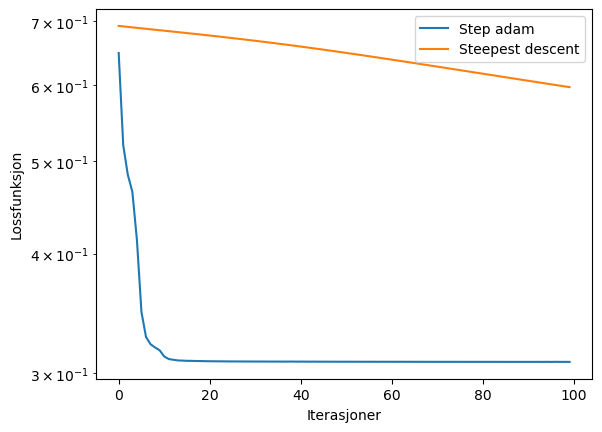

In [9]:
#lengden på rekken som sorteres er 5
#antall mulige siffer er 2
#d, k, p er dimensjonene på vektmatrisene og er hhv 10, 5, 15
#Antall iterasjoner i treningen er 100, siden det er mer enn tilstrekkelig
super_oppgave_3_2(length=5, m=2, d=10, k=5, p=15, n_iter=100)

Ingen av sekvensene ble sortert riktig før trening med adams-algoritmen og alle sekvensene ble sortert riktig etter trening. Ingen av sekvensene ble sortert riktig før trening med steepest-descent-algoritmen og 16% av sekvensene ble sortert riktig etter trening.

Man ser at etter trening sorterer nettverket sekvenser mye bedre enn før, når nettverket er trent med adams-algoritmen, som er å forvente utifra plottet av loss-funksjonen som funksjon av trening. Videre ser man at steepest-descent-algoritmen trener nettverket i langt mindre grad enn adams-algoritmen, gitt like mange iterasjoner, hvilket er som forventet, siden lossfunksjonen synker saktere med steepest-descent-algoritmen.

Det er mulig å generere $2^5 = 32$ forskjellige sekvenser når sekvensens lengde er 5 og antall mulige tall er 2. Nettverkene ble trent med 2500 datapunker, som gjør at det er svært lite sannsynlig at ikke nettverket er blitt trent på alle forskjellige mulige sekvenser, som betyr at nettverket blir testet på sekvenser det allerede er trent på.

Andel korrekt sortert før trening med Step adam 0.0
Andel korrekt sortert etter trening med Step adam 0.9984
Andel korrekt sortert før trening med Steepest descent 0.0
Andel korrekt sortert etter trening med Steepest descent 0.0164


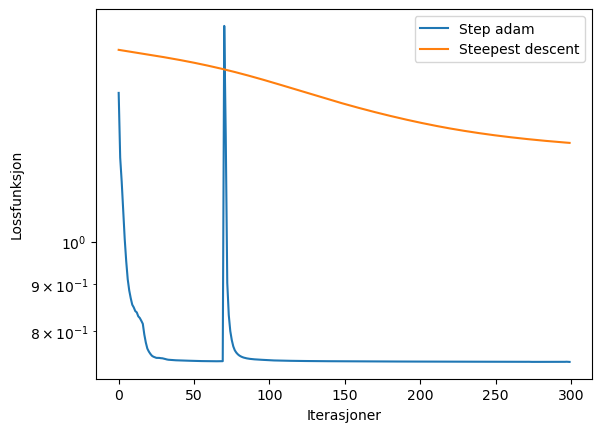

In [10]:
#lengden på rekken som sorteres er 7
#antall mulige siffer er 5
#d, k, p er dimensjonene på vektmatrisene og er hhv 20, 10, 25
#Antall iterasjoner i treningen er 300
super_oppgave_3_2(length=7, m=5, d=20, k=10, p=25, n_iter=300)

Ingen av sekvensene ble sortert riktig før trening med adams-algoritmen og 99,84% av sekvensene ble sortert riktig etter trening. Ingen av sekvensene ble sortert riktig før trening med steepest-descent-algoritmen og 1,64% av sekvensene ble sortert riktig etter trening.

Man ser at etter trening sorterer nettverket sekvenser mye bedre enn før, når nettverket er trent med adams-algoritmen, som er å forvente utifra plottet av loss-funksjonen som funksjon av trening. Videre ser man at steepest-descent-algoritmen trener nettverket i langt mindre grad enn adams-algoritmen, gitt like mange iterasjoner, hvilket er som forventet, siden lossfunksjonen synker saktere med steepest-descent-algoritmen. Årsaken til de plutselige midlertidige stigningene i Adam-algoritmen er uteliggere i datasettene. Disse vil midlertidig endre vektene mye på en måte som ikke passer med de andre datasettene. 

### Addisjon

3.4) Addisjonsproblemet for tosifrede tall $a$ og $b$ er implementert i "oppgave3_4.py". Vi laget to nevrale nettverk med $L = 3$ og parametere $(d, k, p) = (30,20,40)$, slik som oppgaven foreslo. Det første nettverket benyttet Adam-algoritmen i treningsprosessen, mens det andre brukte steepest descent. Begge nettverkene kjører 150 iterasjoner eller til loss-funksjonen blir mindre enn $0,01$. De to nettverkene ble trent på de samme 250 datapunkter per batch og 20 batcher (totalt 5000 datapunkter) og med 150 iterasjoner. Når vi adderer to tosifrede tall, er det $10000$ mulige tallkombinasjoner, og under treningen bruker vi $5000$ av disse. Etter treningen tester vi hvor god de nevrale nettverkene er på de gjenværende $5000$ tallparene i tillegg til de $5000$ tallparene vi trente på, slik at vi totalt tester på alle de $10 000$ mulighetene vi kan ha. Vi plotter den gjennomsnittlige verdien av lossfunksjonen over batchene for de to nettverkene.

korrekt test Adam:  4968
korrekt train Adam:  4981
Prosentandel riktig Adam:  0.9949
korrekt test SD:  59
korrekt train SD:  40
Prosentandel riktig SD:  0.0099


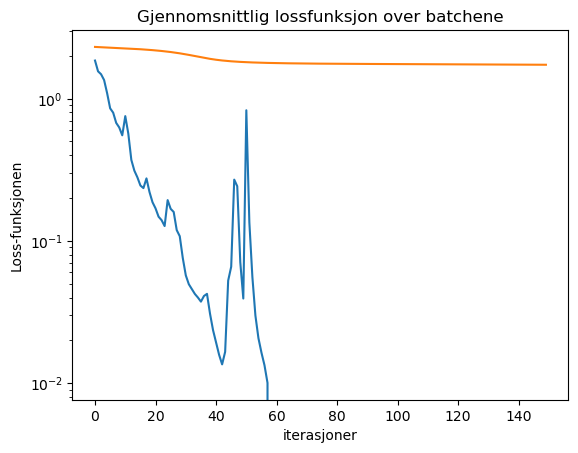

In [11]:
avg_loss_adam, avg_loss_sd = oppgave3_4()
plt.semilogy(avg_loss_adam, label = "Step Adam")
plt.semilogy(avg_loss_sd, label = "Steepestdescent")
plt.xlabel("iterasjoner")
plt.ylabel("Loss-funksjonen")
plt.title("Gjennomsnittlig lossfunksjon over batchene")
plt.show()

Vi ser fra grafen at nettverket som benyttet Adam-steget kommer raskt under vår toleranse på $0,01$. Nettverket som benyttet steepest descent, derimot, synker gradvis nedover, men har ikke forbedret seg så mye. Dette stemmer godt med teorien om at Adam-steget konvergerer raskerer for visse problemer. Steepest descent kan derimot være en egnet metode på nye problemer. Resultatet var at nettverket som benyttet Adam-algoritmen fikk 99,49% riktig på de totalt 10000 mulighetene, mens nettverket som brukte Steepest descent fikk kun 0,99%




### Bonusoppgave

In [12]:
def generate(net,start_idx,m,n_max,n_gen):

    #We will concatenate all generated integers (idx) in total_seq_idx
    total_seq_idx = start_idx

    n_total = total_seq_idx.shape[-1]
    slice = 0

    x_idx = start_idx

    while n_total < n_gen:
        n_idx = x_idx.shape[-1]
        X = onehot(x_idx,m)

        #probability distribution over m characters
        Z = net.forward(X)

        #selecting the last column of Z (distribution over final character)
        hat_Y = Z[0,:,-1]

        #sampling from the multinomial distribution
        #we do this instead of argmax to introduce some randomness
        #avoiding getting stuck in a loop
        y_idx = np.argwhere(np.random.multinomial(1, hat_Y.T)==1)

        if n_idx+1 > n_max:
            slice = 1

        #we add the new hat_y to the existing sequence
        #but we make sure that we only keep the last n_max elements
        x_idx = np.concatenate([x_idx[:,slice:],y_idx],axis=1)

        #we concatenate the new sequence to the total sequence
        total_seq_idx = np.concatenate([total_seq_idx,y_idx],axis=1)

        n_total = total_seq_idx.shape[-1]

    return total_seq_idx

In [13]:
d = 80
n_max = 50
p = 100
k = 25
L = 2

text =  open('input.txt', 'r').read()
data,idx_to_text,text_to_idx, m = text_to_training_data(n_max,text,num_batches=20,batch_size=50)


print("We will train on %d batches of size %d" % (len(data['x_train']),len(data['x_train'][0])))
print("Each sequence has length %d" % n_max)

print("Example of a sequence (chars): \n")
print(''.join([idx_to_text[i] for i in data['x_train'][0][0]]))

print("\nExample of a sequence (idx): \n")
print(data['x_train'][0][0])

data has 1115393 characters, 65 unique.
We will train on 20 batches of size 50
Each sequence has length 50
Example of a sequence (chars): 

First Citizen:
Before we proceed any further, hear

Example of a sequence (idx): 

[18 47 56 57 58  1 15 47 58 47 64 43 52 10  0 14 43 44 53 56 43  1 61 43
  1 54 56 53 41 43 43 42  1 39 52 63  1 44 59 56 58 46 43 56  6  1 46 43
 39 56]


In [16]:
layers = [EmbedPosition(n_max, m, d), Attention(d, k), FeedForward(d, p), Attention(d, k), FeedForward(d, p),  LinearLayer(d, m), Softmax()]
net = NeuralNetwork(layers)
loss = CrossEntropy()

In [17]:
x, y = data["x_train"], data["y_train"]
X, Y = batchmaker(np.array(x), m), batchmaker(np.array(y), m)
loss_arr = net.adams_algoritmen(loss, X, Y, 150, 10**-2)

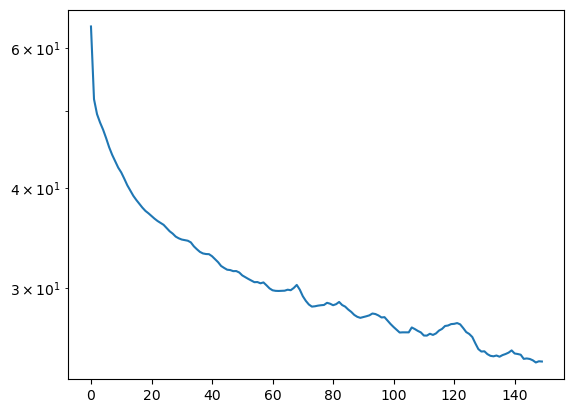

In [18]:
plt.semilogy(np.sum(loss_arr, axis=0))
plt.show()

In [19]:
#We can now generate text from an initial string
start_text = "Thou shall not"
start_idx = []
for e in start_text:
    start_idx.append(text_to_idx[e])
start_idx = np.array([start_idx])
print(start_idx)

[[32 46 53 59  1 57 46 39 50 50  1 52 53 58]]


In [20]:
#length of the total text sequence we want to generate
n_gen = 10*n_max

generated_idx = generate(net,start_idx,m,n_max,n_gen)
#print(generated_idx.shape)
test = ""
for e in generated_idx[0]:
    test += idx_to_text[e]
print(test)

Thou shall nothitite Madyed him; and fack of mece off of his peasing not ficers.

CORIOLANUS:
Nowes day, let the geas!

LARTIUS:
Your none his Nay.

When the noner the say the to stendstall,
They!
They thou war
Mostiong the say none should men: May like set his glet your burave belas!
That ast, shere should me my foulamm the what drequechare itild afeplers,
That think mostichen grebshound him: Tis gindeed beas the seas!
Toold that the rep in say!
Aufid bleast lep diet her thould cetscest: ay, a 


I prosjektet vårt lærte vi å bruke objektorientert programmering til å implementerte dyp læring og mer spesifikt en transformermodell. Vi brukte denne transformermodellen til å kunne sortere lister, addere to tall og kunne generere tekst slik som Shakespeare kunne ha skrevet.
Som treningsalgoritmene på de to førstnevnte oppgavene brukte vi både steepest descent og Adam-algoritmen, og fant at Adam-algoritmen var en mye bedre treningsalgoritme på disse to tilfellene. 